# Sprint 1 Data Collection, Cleaning, and Initial EDA
# Restaurants
---

## Data Collection

In [64]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [65]:
# load and view restaurants data
# NOTE: the data is a combination of smaller csv files across multiple queries
df_restaurants = pd.read_csv("merged_restaurants_v1.csv", index_col = 0)
df_restaurants

,name,description,is_spending_on_ads,reviews,competitors,website,phone,can_claim,owner_name,owner_profile_link,...,main_category,categories,rating,workday_timing,is_temporarily_closed,closed_on,address,review_keywords,link,query
place_id,,,,,,,,,,,,,,,,,,,,,
ChIJl0RSgqh3hlQRXzBHCOpOPDc,Hart House Restaurant,Mediterranean inspired cuisine.\r\n\r\nLakesid...,NaN,1210.0,Name: Atlas Steak + Fish\r\nLink: https://www....,http://www.harthouserestaurant.com/,(604) 298-4278,NaN,Hart House Restaurant (Owner),https://www.google.com/maps/contrib/1070633898...,...,European restaurant,"European restaurant, Mediterranean restaurant",4.4,"11:30 a.m.-2:30 p.m., 5-10 p.m.",NaN,Monday,"6664 Deer Lake Ave, Burnaby, BC V5E 4H3","lake, patio, brunch, deer, wedding venue, fine...",https://www.google.com/maps/place/Hart+House+R...,restaurants in burnaby bc
ChIJR66qkPl3hlQRo3sbz6cmASs,Birdies,Birdies Eats & Drinks is a California-inspired...,NaN,986.0,Name: Wendy's\r\nLink: https://www.google.com/...,https://birdiesrestaurant.com/,(236) 427-8902,NaN,Birdies (Owner),https://www.google.com/maps/contrib/1079914066...,...,Californian restaurant,Californian restaurant,4.2,11 a.m.-11 p.m.,NaN,Open All Days,"3850 Lougheed Hwy., Burnaby, BC V5C 6N4","happy hour, margarita, calamari, korean bbq ri...",https://www.google.com/maps/place/Birdies/data...,restaurants in burnaby bc
ChIJo8kisoB3hlQRWzce83f0Aa4,SOJU,FUSION Chinese Kitchen with SOJU\r\nWE LIKE YO...,NaN,275.0,Name: Jang Mo Jib Metrotown\r\nLink: https://w...,NaN,(604) 336-5234,NaN,SOJU (Owner),https://www.google.com/maps/contrib/1122924436...,...,Restaurant,Restaurant,4.4,11:30 a.m.-1 a.m.,NaN,Open All Days,"5152 Kingsway, Burnaby, BC V5H 2E8","korean food, jjajangmyeon, black bean noodle, ...",https://www.google.com/maps/place/SOJU/data=!4...,restaurants in burnaby bc
ChIJQ94YI0F2hlQRThl4MaBwzO0,Tenen Restaurant,We specialize in traditional Eastern European ...,NaN,1251.0,Name: No. 1 Beef Noodle\r\nLink: https://www.g...,http://www.tenenrestaurant.com/,(604) 336-6665,NaN,Tenen Restaurant (Owner),https://www.google.com/maps/contrib/1122022569...,...,Eastern European restaurant,"Eastern European restaurant, Serbian restaurant",4.7,10:30 a.m.-10:30 p.m.,NaN,Open All Days,"7569 Royal Oak Ave c, Burnaby, BC V5J 4J8","serbian food, cevapi, meat platter, cabbage ro...",https://www.google.com/maps/place/Tenen+Restau...,restaurants in burnaby bc
ChIJ1f_faOt3hlQR9UNINfOqmmU,#CHIBOP,"Korean chicken, Korean food, Cupbop, Bibimbap,...",NaN,352.0,Name: Sooda Korean BBQ\r\nLink: https://www.go...,http://www.chibop.ca/,(604) 566-5971,NaN,#CHIBOP (Owner),https://www.google.com/maps/contrib/1171679925...,...,Korean restaurant,Korean restaurant,4.5,11:30 a.m.-9 p.m.,NaN,Open All Days,"1805 Rosser Ave, Burnaby, BC V5C 6R4","gimbap, spicy, take out, food and service, yan...",https://www.google.com/maps/place/%23CHIBOP/da...,restaurants in burnaby bc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChIJO-v1RhBuhlQRfZeVUWWKozs,Domino's Pizza,Domino's Pizza in West Vancouver - Order pizza...,NaN,240.0,Name: Freshslice Pizza\r\nLink: https://www.go...,https://pizza.dominos.ca/west-vancouver-britis...,(604) 922-3013,NaN,Domino's Pizza (Owner),https://www.google.com/maps/contrib/1035323707...,...,Pizza delivery,"Pizza delivery, Pizza restaurant, Pizza takeaway",3.9,10:30 a.m.-12 a.m.,NaN,Open All Days,"1826 Marine Dr, West Vancouver, BC V7V 1J6","price, crust, order, tip, coupons, quantity, f...",https://www.google.com/maps/place/Domino%27s+P...,restaurants in west vancouver bc
ChIJ7-_t7CFyhlQRi7LZGVmtdSs,Teahouse in Stanley Park,Cheerful spot in the park offering refined sea...,NaN,2209.0,Name: Honey Salt\r\nLink: https://www.google.c...,http://vancouverdine.com/teahouse,(604) 669-3281,NaN,Teahouse in Stanley Park (Owner),https://www.google.com/maps/contrib/1176890664...,...,Restaurant,Restaurant,4.4,11:30 a.m.-9 p.m.,1.0,"Tuesday, Wednesday","7501 Stanley Park Dr, Vancouver, BC V6G 1Z4"

TASK: Find high-level information about this dataset such as:
1. Data shape and size
2. Column names
3. Data types

In [66]:
# check for data shape and size
print(f'The restaurants dataset consists of {df_restaurants.shape[0]} rows and {df_restaurants.shape[1]} columns.')
print(f'The dataset consists of {df_restaurants.size} elements.')

The restaurants dataset consists of 616 rows and 21 columns.
The dataset consists of 12936 elements.


In [67]:
# check column names
df_restaurants.columns

Index(['name', 'description', 'is_spending_on_ads', 'reviews', 'competitors',
       'website', 'phone', 'can_claim', 'owner_name', 'owner_profile_link',
       'featured_image', 'main_category', 'categories', 'rating',
       'workday_timing', 'is_temporarily_closed', 'closed_on', 'address',
       'review_keywords', 'link', 'query'],
      dtype='object')

In [68]:
# check for data types
df_restaurants.dtypes

name                      object
description               object
is_spending_on_ads       float64
reviews                  float64
competitors               object
website                   object
phone                     object
can_claim                float64
owner_name                object
owner_profile_link        object
featured_image            object
main_category             object
categories                object
rating                   float64
workday_timing            object
is_temporarily_closed    float64
closed_on                 object
address                   object
review_keywords           object
link                      object
query                     object
dtype: object

#### Data Collection Findings

There are 616 row and 21 columns. All columns are set to object data type due to merging multiple csv file. Not all columns will be used in the csv file. 

The following columns will be used for a recommendation system model 
- name
- description
- reviews
- website
- main_category
- categories
- rating
- address
- review_keywords

The following columns will be converted be changed to float64 or int64 for EDA: rating, reviews

--- 

## Data Cleaning  

In [69]:
# filter columns for upcoming model
df_restaurants = df_restaurants[['name','description','reviews','website','main_category','categories','rating','address','review_keywords']]
df_restaurants

,name,description,reviews,website,main_category,categories,rating,address,review_keywords
place_id,,,,,,,,,
ChIJl0RSgqh3hlQRXzBHCOpOPDc,Hart House Restaurant,Mediterranean inspired cuisine.\r\n\r\nLakesid...,1210.0,http://www.harthouserestaurant.com/,European restaurant,"European restaurant, Mediterranean restaurant",4.4,"6664 Deer Lake Ave, Burnaby, BC V5E 4H3","lake, patio, brunch, deer, wedding venue, fine..."
ChIJR66qkPl3hlQRo3sbz6cmASs,Birdies,Birdies Eats & Drinks is a California-inspired...,986.0,https://birdiesrestaurant.com/,Californian restaurant,Californian restaurant,4.2,"3850 Lougheed Hwy., Burnaby, BC V5C 6N4","happy hour, margarita, calamari, korean bbq ri..."
ChIJo8kisoB3hlQRWzce83f0Aa4,SOJU,FUSION Chinese Kitchen with SOJU\r\nWE LIKE YO...,275.0,NaN,Restaurant,Restaurant,4.4,"5152 Kingsway, Burnaby, BC V5H 2E8","korean food, jjajangmyeon, black bean noodle, ..."
ChIJQ94YI0F2hlQRThl4MaBwzO0,Tenen Restaurant,We specialize in traditional Eastern European ...,1251.0,http://www.tenenrestaurant.com/,Eastern European restaurant,"Eastern European restaurant, Serbian restaurant",4.7,"7569 Royal Oak Ave c, Burnaby, BC V5J 4J8","serbian food, cevapi, meat platter, cabbage ro..."
ChIJ1f_faOt3hlQR9UNINfOqmmU,#CHIBOP,"Korean chicken, Korean food, Cupbop, Bibimbap,...",352.0,http://www.chibop.ca/,Korean restaurant,Korean restaurant,4.5,"1805 Rosser Ave, Burnaby, BC V5C 6R4","gimbap, spicy, take out, food and service, yan..."
...,...,...,...,...,...,...,...,...,...
ChIJO-v1RhBuhlQRfZeVUWWKozs,Domino's Pizza,Domino's Pizza in West Vancouver - Order pizza...,240.0,https://pizza.dominos.ca/west-vancouver-britis...,Pizza delivery,"Pizza delivery, Pizza restaurant, Pizza takeaway",3.9,"1826 Marine Dr, West Vancouver, BC V7V 1J6","price, crust, order, tip, coupons, quantity, f..."
ChIJ7-_t7CFyhlQRi7LZGVmtdSs,Teahouse in Stanley Park,Cheerful spot in the park offering refined sea...,2209.0,http://vancouverdine.com/teahouse,Restaurant,Restaurant,4.4,"7501 Stanley Park Dr, Vancouver, BC V6G 1Z4","tea house, sunset, ocean, wedding reception, s..."
ChIJnzQ9SDNwhlQRWxrmVzbWQww,McDonald's,"From the Big Mac to the Quarter Pounder, we ha...",1336.0,https://www.mcdonalds.com/ca/en-ca/restaurant-...,Fast food restaurant,"Fast food restaurant, American restaurant, Bre...",3.2,"808 Marine Dr, West Vancouver, BC V7T 1A1","drive through, coffee, manager, parking, machi..."


In [70]:
# drop null last row
df_restaurants = df_restaurants[:-1]

In [71]:
# convert reviews and rating in df_van_attractions to int64
df_restaurants = df_restaurants.astype({'reviews': int, 'rating': float})
df_restaurants.dtypes

name                object
description         object
reviews              int32
website             object
main_category       object
categories          object
rating             float64
address             object
review_keywords     object
dtype: object

---

## Initial Exploratory Data Analysis

- Distribution of Data
- Check for null values
- Check for duplicated Columns/Rows

In [72]:
# check for null values in data
df_restaurants.isna().sum()

name                0
description        91
reviews             0
website            51
main_category       0
categories          0
rating              0
address             0
review_keywords     4
dtype: int64

In [73]:
# count for duplicated rows in the dataset
len(df_restaurants)-len(df_restaurants.drop_duplicates())

34

In [74]:
# view unique values for main_category
df_restaurants["main_category"].value_counts()

main_category
Restaurant                153
Chinese restaurant         32
Sushi restaurant           24
Breakfast restaurant       24
Brunch restaurant          22
                         ... 
Vegan restaurant            1
Western restaurant          1
Steak house                 1
Fried chicken takeaway      1
Pizza delivery              1
Name: count, Length: 96, dtype: int64

In [77]:
# check for rows where null values are present 
null_df = df_restaurants.isnull().any(axis=1)
null_rows = df_restaurants[null_df]
print(null_rows)

                                                       name  \
place_id                                                      
ChIJo8kisoB3hlQRWzce83f0Aa4                            SOJU   
ChIJh9iYHRh3hlQR8GaY_dj1RHM            Claudio's Ristorante   
ChIJ14JKF912hlQRYZE-mbCH6oU                    Yaser's Cafe   
ChIJEWEWP8Z3hlQRF-KmROb-gxg            Little Cockatoo Cafe   
ChIJI5w5-BV3hlQRhnqR5h7tEns               K Chicken Burnaby   
...                                                     ...   
ChIJJYzxPohxhlQRFHN7EYdtbZE                   Kintaro Ramen   
ChIJIw2k0T5vhlQRlJ7Yywa2DRY                Hatam Restaurant   
ChIJ-TOcTs1xhlQR2eU3G1eX1A8          Yummy Donair and Kebab   
ChIJJ8WTLQBvhlQRgtmV94pEjVQ          Foodie north Vancouver   
ChIJF-zxPYhxhlQRz2nehz3oMaA  Afghani Kabul Kebab Donair Ltd   

                                                                   description  \
place_id                                                                         
ChIJo8kisoB3hlQR

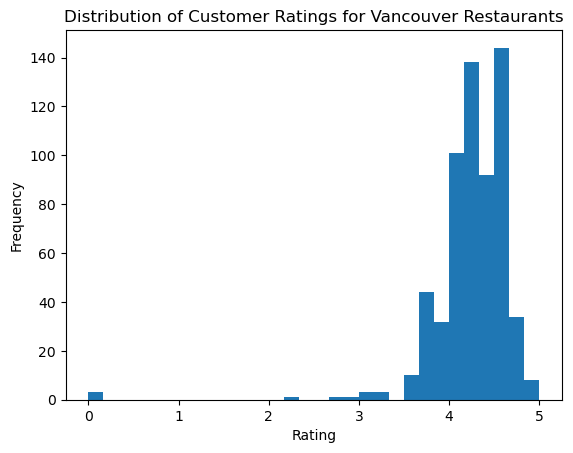

In [75]:
# plot histogram for ratings 
plt.figure()
plt.title('Distribution of Customer Ratings for Vancouver Restaurants')
plt.hist(df_restaurants['rating'],bins=30)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

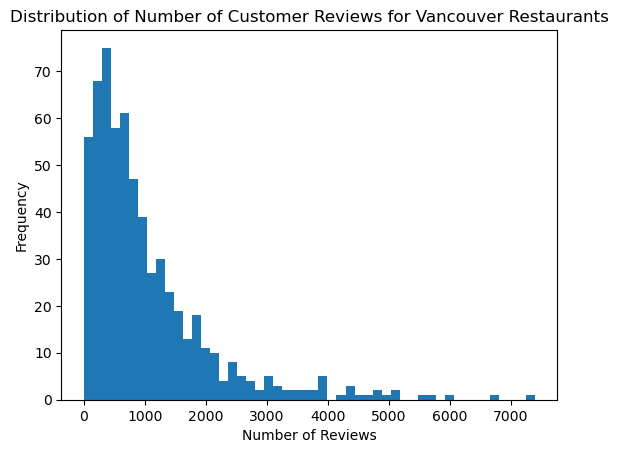

In [76]:
# plot histogram for number of reviews 
plt.figure()
plt.title('Distribution of Number of Customer Reviews for Vancouver Restaurants')
plt.hist(df_restaurants['reviews'],bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

#### Inital EDA Findings

The restaurant data requires further collection and cleaning before proceding to using the baseline model.

There are 116 rows of data containing null values out of the total 532 rows. The columns description, website, and review_keywords are where the data has null values. Since those values won't be used in the baseline model, there is no need to replace them at this point. Those columns are meant to give additional insight to users about the restaurants.    

There are 34 rows of duplicated data out of the total 616 rows. The reason for this duplicated data is from the querying from Google Maps Extractor. The more you query specific types of restaurants, the more likely the results tend to overlap. Restaurants can fall under many types. For example, a chinese restaurant can also be a breakfast restaurant type. The next steps would be to drop the duplicated data and expand the scope of the queries to go beyond Vancouver such as North Vancouver, West Vancouver, Burnaby, and Richmond.

From the main_category, there are 96 unique values. For the next steps, those that have one or few counts of restaurants can be added to a larger category type. For example, Steak house can be under the broader Dinner category.  

The distribution of data for rating and reviews are skewed to a certain range which could impact model evaluation. The rating for attractions is skewed right towards range of 3.5 to 5 stars out of 5. The reason for the skewed ratings can come from how the search engine for Google Maps and their own recommendation model. The number of reviews for attractions is skewed left towards 0-2000 reviews. The next steps would be to transform the data prior to the baseline model to ensure the columns are treated equally.

The proposed baseline model would be to explore Unsupervised Learning, specifically Clustering as there are no known target variables in this dataset.  

